## A/B testing for churn reduction
Let’s assume an unengaged user is a churned user. Now suppose we use your model to identify unengaged users and implement some business actions try to convert them to engaged users (commonly known as reducing churn)
1. What metrics and techniques would you use to assess the impact of the business action?<br>
A valid metric that we could try to track is the number of completed/pending transactions that the users in the test group complete within a timeframe of `N` days. The time period `N` can be chosen as something reasonable as 100 days. If the buisness actions works, we should be seeing a gretaer number of transactions within the test group compared to the control group where no buisness actions were taken
* How would you set up a test/experiment to check whether we are actually reducing churn?


In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scs
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import math
style.use('ggplot')
from IPython.display import display, HTML
from pylab import rcParams
%matplotlib inline

### Create a dummy dataset

In [2]:
df_hv = pd.DataFrame()
df_hv['customer_id'] = np.array([count for count in range(2000)])
df_hv['group'] = 'control'
df_hv.loc[df_hv.index<1000,'group'] = 'test'
print(df_hv.group.value_counts())
df_hv.head()

test       1000
control    1000
Name: group, dtype: int64


,customer_id,group
0,0,test
1,1,test
2,2,test
3,3,test
4,4,test


In [3]:
#assuming 2 transactions (on an avergae) over a 100 day period for the test group with buisness intervention
# and 1 tranaction for the control group.
df_hv.loc[df_hv.group == 'test', 'transaction_count'] = np.random.poisson(2.0, 1000)
df_hv.loc[df_hv.group == 'control', 'transaction_count'] = np.random.poisson(1.0, 1000)


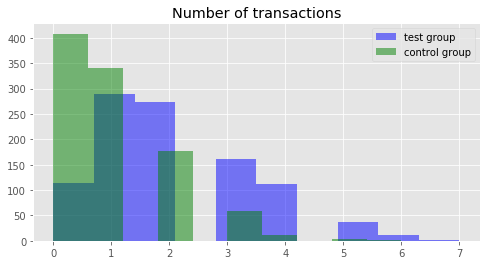

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_hv.loc[df_hv.group == 'test'].transaction_count, 
        alpha=0.5, color="blue", label="test group")
ax.hist(df_hv.loc[df_hv.group == 'control'].transaction_count, 
        alpha=0.5, color="green", label="control group")
ax.set_title("Number of transactions")
ax.legend()

#### t-statistic: 
Represents the difference between averages of test and control group in units of standard error. Higher t-statistic value means bigger difference and supports our hypothesis.
#### p-value: 
Measures the probability of the null hypothesis to be true.

Based on the results below we can invalidate the null hypothesis that there has been no change because of the buisness action.

In [5]:
test_results = df_hv[df_hv.group == 'test'].transaction_count
control_results = df_hv[df_hv.group == 'control'].transaction_count

test_result = scs.ttest_ind(test_results, control_results)
print(test_result)

Ttest_indResult(statistic=20.288091299699847, pvalue=2.3171483736334694e-83)
